In [1]:
# Perform imports and load the dataset:
import pandas as pd
df = pd.read_csv("smsspamcollection.csv",encoding="ISO-8859-1")
df.shape
df.head()
df.info()
# Checking for null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


v1    0
v2    0
dtype: int64

In [2]:
# Checking Duplicate values
df.duplicated().sum()
# Drop Duplicate values
df=df.drop_duplicates()
df.shape
# renaming the columns
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.describe()
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4516   4516  Go until jurong point, crazy.. Available only ...    1
spam      653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

,label_num,message_len
count,653.0,653.000000
mean,1.0,137.891271
std,0.0,30.137753
min,1.0,13.000000
25%,1.0,132.000000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


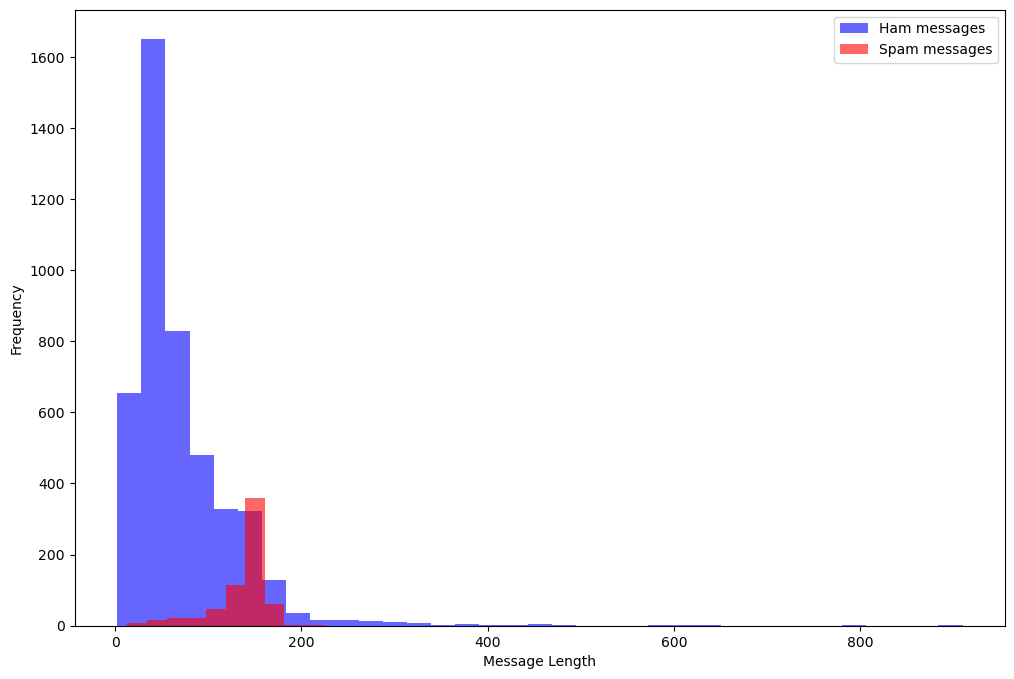

In [4]:
# convert label to a numerical variable
df['label_num'] = df.label.map({'ham':0, 'spam':1})
df.head()
df['message_len'] = df.message.apply(len)
df.head()
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
df[df.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue',
label='Ham messages', alpha=0.6)
df[df.label=='spam'].message_len.plot(kind='hist', color='red',
label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")
df[df.label=='ham'].describe()
df[df.label=='spam'].describe()

In [5]:
# import library
import re
import string
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords
stemmer = nltk.SnowballStemmer("english")
def preprocess(text):
    text = text.lower() # Convert text to lowercase
    text = re.sub(r'\[.*?\]', '', text) # Remove text within square brackets
    text = re.sub(r'http\S+\s*\S+', '', text) # Remove URLs starting with http
    text = re.sub(r'www\.\S+', '', text) # Remove URLs starting with www
    text = re.sub(r'<.*?>', '', text) # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = re.sub(r'\b\w*\d\w*\b', '', text) # Remove words containing numbers
    text = ' '.join(word for word in text.split(' ') if word not in stop_words) #remove
    stopwords
    text = ' '.join(stemmer.stem(word) for word in text.split(' ')) #stemming
    return text
df['message_clean'] = df['message'].apply(preprocess)
df.head(20)
print(df['message_clean'][304])

sms ac blind date    aberdeen unit kingdom check   blind date send hide


In [6]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


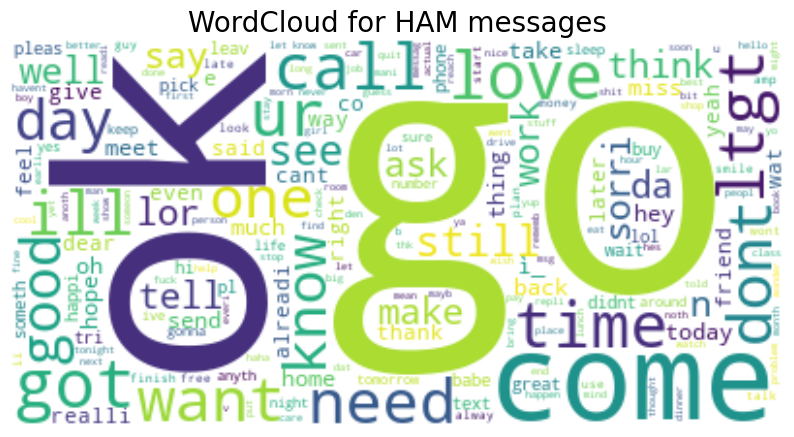

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Create a WordCloud object
wc = WordCloud(
 background_color='white',
max_words=200,
 contour_color='steelblue', # Add contour color
 contour_width=2, # Add contour width
)
# Generate the WordCloud using text data for HAM messages
ham_text = ' '.join(text for text in df.loc[df['label'] == 'ham', 'message_clean'])
wc.generate(ham_text)
# Visualize the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud for HAM messages', fontsize=20)
plt.axis('off')
plt.show()

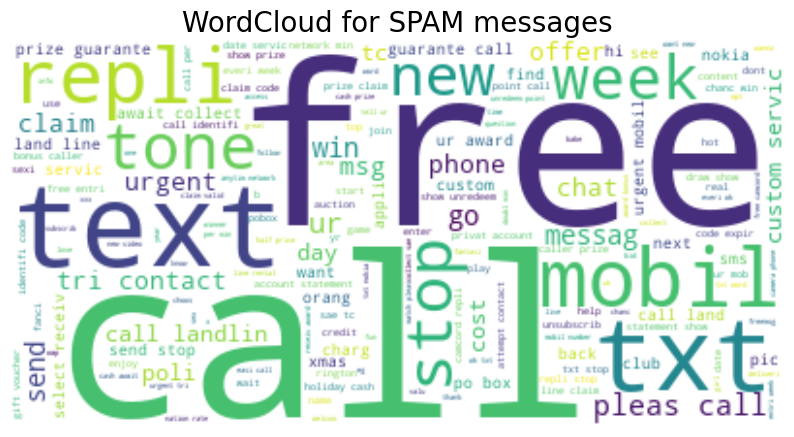

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Create a WordCloud object
wc = WordCloud(
 background_color='white',
 max_words=200,
 contour_color='steelblue', # Add contour color
 contour_width=2, # Add contour width
)
# Generate the WordCloud using text data for SPAM messages
ham_text = ' '.join(text for text in df.loc[df['label'] == 'spam', 'message_clean'])
wc.generate(ham_text)
# Visualize the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud for SPAM messages', fontsize=20)
plt.axis('off')
plt.show()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
X = tfidf_vect.fit_transform(df['message_clean'])
y = df['label']

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Naive Bayes
nb_clf = MultinomialNB().fit(X_train, y_train)
# SVM
svm_clf = SVC(kernel='linear').fit(X_train, y_train)

In [11]:
# Performance metrics comparison
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score # Importing accuracy_score
# Naive Bayes
nb_predicted = nb_clf.predict(X_test)
nb_report = classification_report(y_test, nb_predicted)
# Calculate error rate for Naive Bayes
nb_error_rate = 1 - accuracy_score(y_test, nb_predicted)
nb_cm = confusion_matrix(y_test, nb_predicted)
# SVM
svm_predicted = svm_clf.predict(X_test)
svm_report = classification_report(y_test, svm_predicted)
# Calculate error rate for SVM
svm_error_rate = 1 - accuracy_score(y_test, svm_predicted)
svm_cm = confusion_matrix(y_test, svm_predicted)
nb_cm

array([[1107,    0],
       [  62,  124]])

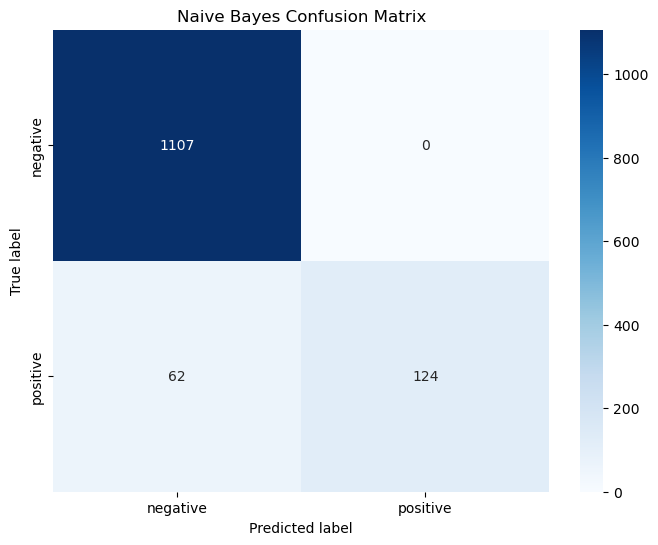

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1107
        spam       1.00      0.67      0.80       186

    accuracy                           0.95      1293
   macro avg       0.97      0.83      0.89      1293
weighted avg       0.95      0.95      0.95      1293


Naive Bayes Error Rate: 0.05


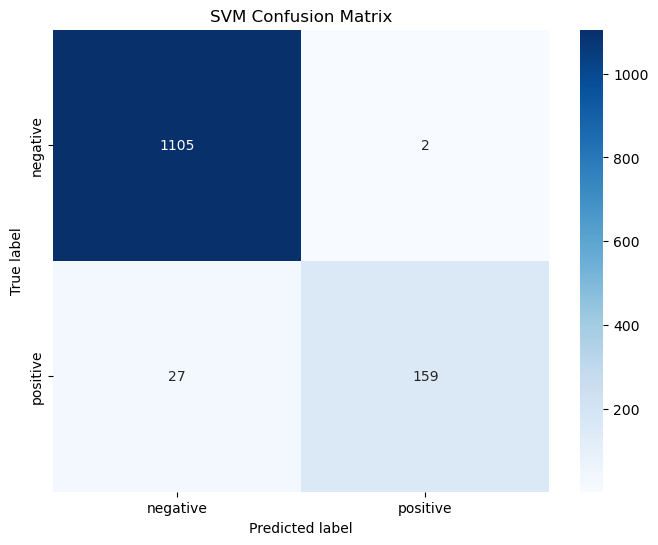


SVM Classifier Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1107
        spam       0.99      0.85      0.92       186

    accuracy                           0.98      1293
   macro avg       0.98      0.93      0.95      1293
weighted avg       0.98      0.98      0.98      1293


SVM Error Rate: 0.02


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes,
    yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(nb_cm, classes=['negative', 'positive'], title='Naive Bayes Confusion Matrix')
print("Naive Bayes Classifier Report:")
print(nb_report)
print(f"\nNaive Bayes Error Rate: {nb_error_rate:.2f}")
# Plot confusion matrix for SVM
plot_confusion_matrix(svm_cm, classes=['negative', 'positive'], title='SVM Confusion Matrix')
print("\nSVM Classifier Report:")
print(svm_report)
print(f"\nSVM Error Rate: {svm_error_rate:.2f}")

# Exercise

                                              Review  \
0  The product arrived on time. Packaging was gre...   
1           THIS PRODUCT IS JUST AMAZING! I LOVE IT.   
2  I bought this phone for $799, and it has a 120...   
3  Wow!!! This product is awesome... but a bit ex...   
4                The laptop works perfectly fine.      

                                          lowercased  \
0  the product arrived on time. packaging was gre...   
1           this product is just amazing! i love it.   
2  i bought this phone for $799, and it has a 120...   
3  wow!!! this product is awesome... but a bit ex...   
4                the laptop works perfectly fine.      

                                        urls_removed  \
0  the product arrived on time. packaging was gre...   
1           this product is just amazing! i love it.   
2  i bought this phone for $799, and it has a 120...   
3  wow!!! this product is awesome... but a bit ex...   
4                the laptop works perfectly fi

/Users/vishnuram/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vishnuram/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vishnuram/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

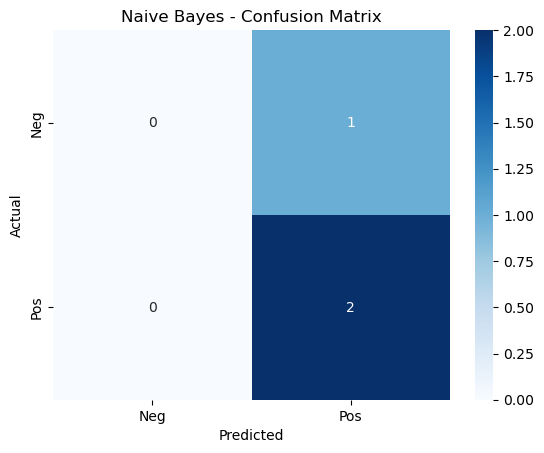

In [20]:
import pandas as pd

# Load the processed reviews file
df = pd.read_csv('Processed_Reviews.csv')
labels = [1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0]
df['label'] = labels
# Preview
print(df.head())
print(df.info())


# Ensure labels are numeric
df['label'] = df['label'].astype(int)

# Drop rows with missing values if any
df.dropna(subset=['lemmatized', 'label'], inplace=True)

from sklearn.feature_extraction.text import TfidfVectorizer

# Use only the lemmatized column for features
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['lemmatized'])

# Target
y = df['label']


from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# SVM (optional)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
nb_pred = nb_model.predict(X_test)
# svm_pred = svm_model.predict(X_test)

# Report
print("Naive Bayes Performance:")
print(classification_report(y_test, nb_pred))
print("Accuracy:", accuracy_score(y_test, nb_pred))

# Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_pred)

# Plot
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
